In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import statsmodels as sm
import plotnine as p9
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
df = pd.read_csv('churn_clean.csv',dtype={'locationid':np.int64})
df.head(5)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [2]:
df.isnull().sum()

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

In [3]:
scaler = StandardScaler()

In [4]:
df_pca = df[['Children', 'Age', 'Income', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure']]
df_pca.head(5)

,Children,Age,Income,Tenure,MonthlyCharge,Bandwidth_GB_Year,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure
0,0,68,28561.99,6.795513,172.455519,904.536110,7.978323,10,0,1
1,1,27,21704.77,1.156681,242.632554,800.982766,11.699080,12,0,1
2,4,50,9609.57,15.754144,159.947583,2054.706961,10.752800,9,0,1
3,1,48,18925.23,17.087227,119.956840,2164.579412,14.913540,15,2,0
4,0,83,40074.19,1.670972,149.948316,271.493436,8.147417,16,2,1


In [5]:
df_pca_std = (df_pca - df_pca.mean())/df_pca.std()

In [6]:
pca = PCA(n_components = df_pca.shape[1])

In [7]:
pca.fit(df_pca_std)

PCA(n_components=10)

In [8]:
df_pca2 = pd.DataFrame(pca.transform(df_pca_std), columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])



In [9]:
loadings = pd.DataFrame(pca.components_.T,
                       columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'],
                       index = df_pca_std.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
Children,0.014135,-0.559467,-0.285319,0.141418,0.031679,-0.057721,0.287326,0.646749,-0.282399,-0.021585
Age,0.001708,0.479836,0.421944,-0.089805,-0.159621,0.125006,0.405096,0.207965,-0.578529,0.022366
Income,0.004360,-0.223932,0.267257,0.166468,0.787136,0.210454,0.294875,-0.302723,-0.090721,-0.000935
Tenure,0.705422,0.001851,0.021078,-0.041735,-0.004963,-0.037044,-0.004471,-0.029719,-0.022244,-0.705262
MonthlyCharge,0.040423,0.344887,-0.299619,0.329364,0.029915,0.704988,0.116154,0.244887,0.328190,-0.045755
Bandwidth_GB_Year,0.706917,-0.007922,-0.019661,-0.012803,0.004627,0.002619,-0.000835,-0.000232,0.009110,0.706784
Outage_sec_perweek,0.005884,0.212260,-0.479537,0.578438,-0.025686,-0.243383,-0.001698,-0.367329,-0.442194,0.000281
Email,-0.020779,0.107067,-0.438465,-0.454312,-0.004960,-0.153997,0.686128,-0.229615,0.205475,0.000246
Contacts,0.004175,0.458770,0.013844,0.104530,0.465026,-0.550932,-0.043184,0.438267,0.254313,-0.000943
Yearly_equip_failure,0.017565,-0.143555,0.395131,0.530963,-0.368864,-0.227787,0.424544,-0.078997,0.408176,-0.000095


In [12]:
cov_matrix = np.dot(df_pca_std.T, df_pca_std) / df_pca.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

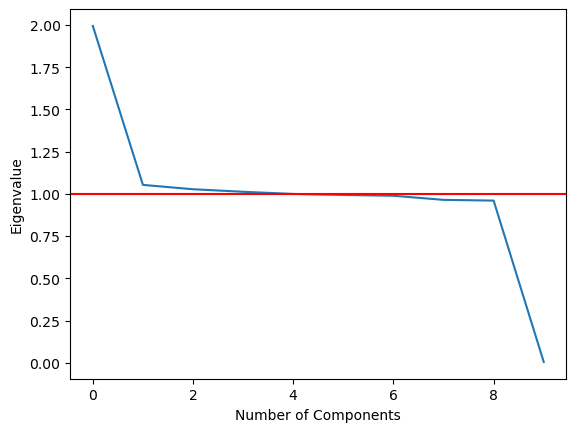

In [13]:
plt.plot(eigenvalues)
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalue')
plt.axhline(y = 1, color = 'red')
plt.show()

In [15]:
pc_contributions = list(pca.explained_variance_ratio_)

In [16]:
pc_names = list(loadings.columns)

In [18]:
for i in range(len(pc_names)):
    print(f"For {pc_names[i]}, the contribution is {round(pc_contributions[i]*100, 3)}%")

For PC1, the contribution is 19.941%
For PC2, the contribution is 10.532%
For PC3, the contribution is 10.275%
For PC4, the contribution is 10.125%
For PC5, the contribution is 9.997%
For PC6, the contribution is 9.937%
For PC7, the contribution is 9.89%
For PC8, the contribution is 9.647%
For PC9, the contribution is 9.603%
For PC10, the contribution is 0.055%
